In [4]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from ucimlrepo import fetch_ucirepo

In [5]:
# Data Loading

# File in UCI repository has no headers
urls = {
    "adult.data": "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "adult.test": "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
    "adult.names": "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"
}

# Create folder
folder_name = "data"
os.makedirs(folder_name, exist_ok=True)

# Download and save files
for filename, url in urls.items():
    response = requests.get(url)

    file_path = os.path.join(folder_name, filename)

    with open(file_path, "wb") as f:
        f.write(response.content)

    print(f"{filename} downloaded successfully.")

columns = [
    "age","workclass","fnlwgt","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week",
    "native-country","income"
]

# Fetch dataset 
df = pd.read_csv(
    "data/adult.data",       # change path if needed
    header=None,
    names=columns,
    sep=",",
    skipinitialspace=True
)

df.head()



adult.data downloaded successfully.
adult.test downloaded successfully.
adult.names downloaded successfully.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Basic stats of data

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()

print("\nSummary Stats:")
print(df.describe())

Shape: (32561, 15)

Columns:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non

In [7]:
# Show missing values count

missing = df.isnull().sum()
print(missing[missing > 0])

print((df.isin(["?", " ?"])).sum())

# Handle missing values

df.replace((["?", " ?"]), np.nan, inplace=True)
df.dropna(inplace=True)
print("Remaining shape:", df.shape)


Series([], dtype: int64)
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Remaining shape: (30162, 15)


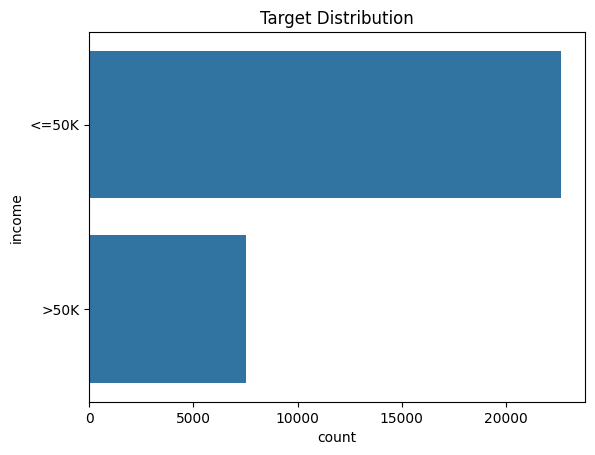

In [8]:
#Target Distribution

sns.countplot(y='income', data=df)
plt.title("Target Distribution")
plt.show()


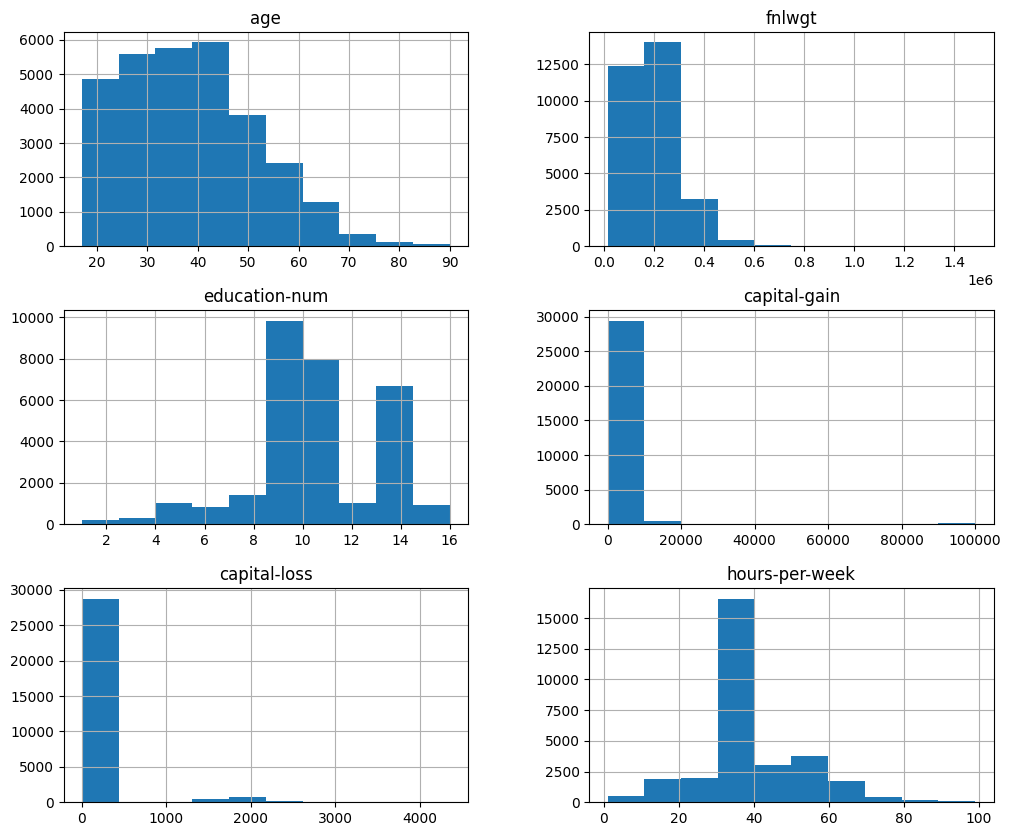

In [9]:
# Feature Histogram
df.hist(figsize=(12,10))
plt.show()


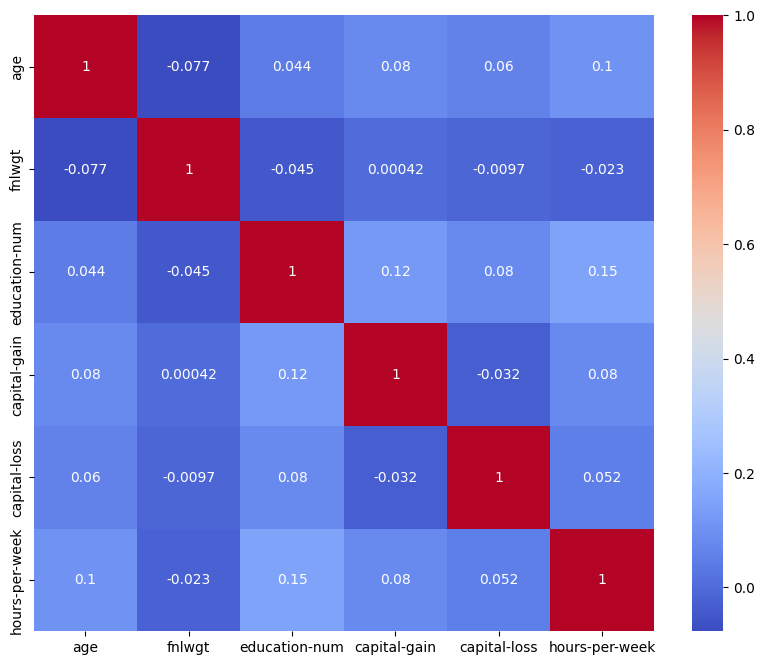

In [10]:
# Correlation Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm')
plt.show()


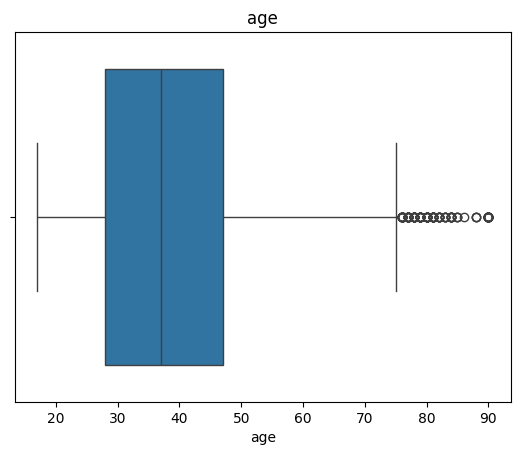

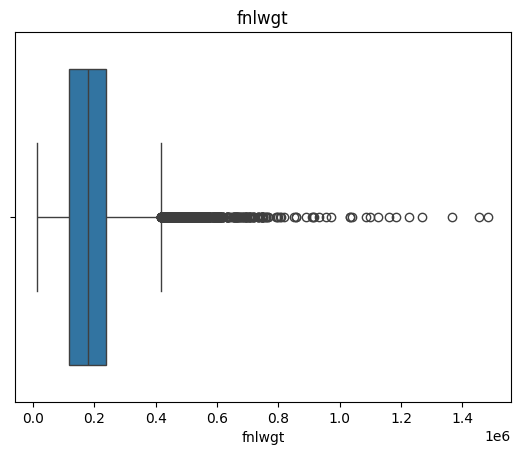

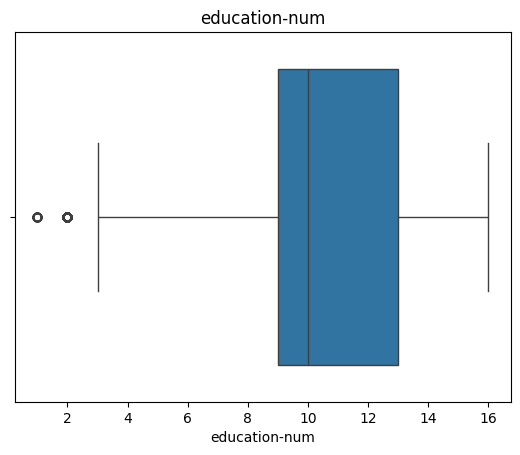

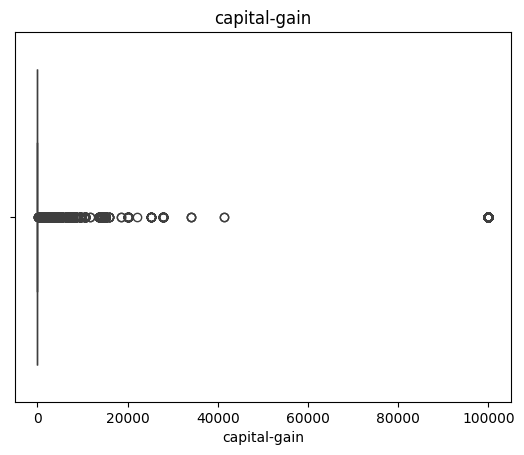

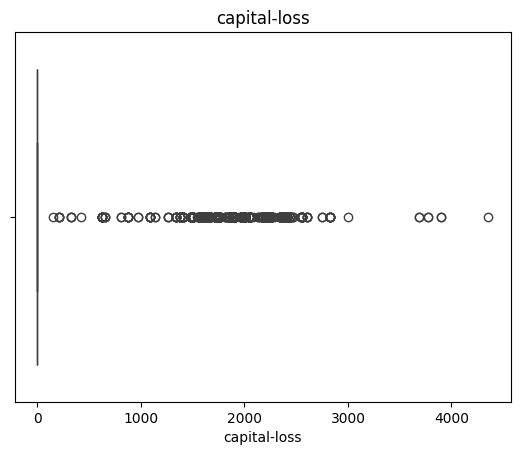

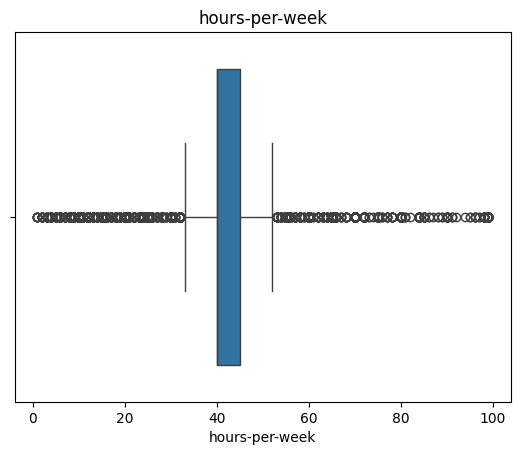

In [11]:
# Boxplot, Outlier detection

num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [12]:
# Categorical Analysis
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(df[col].value_counts())


workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64
education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64
marital-status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64
occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-servi

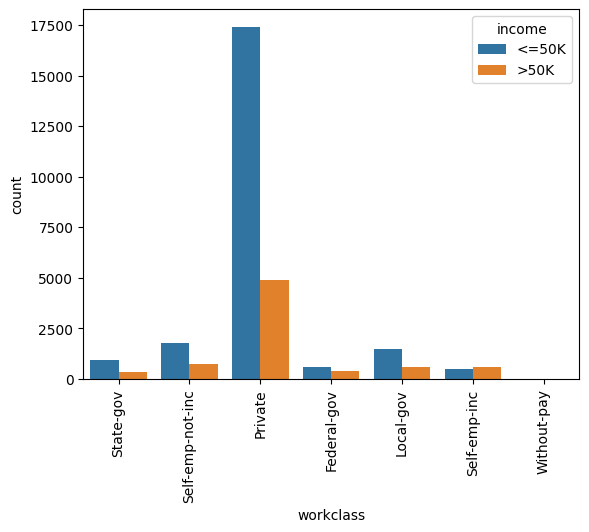

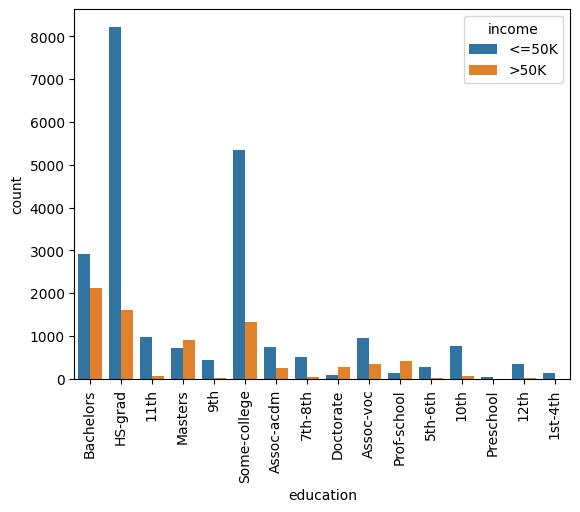

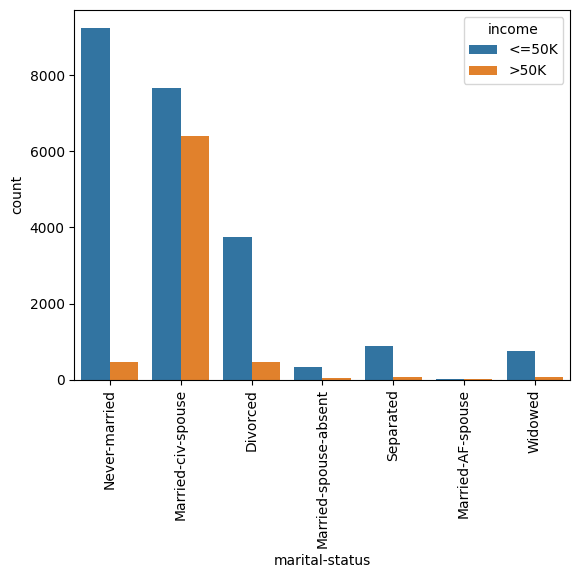

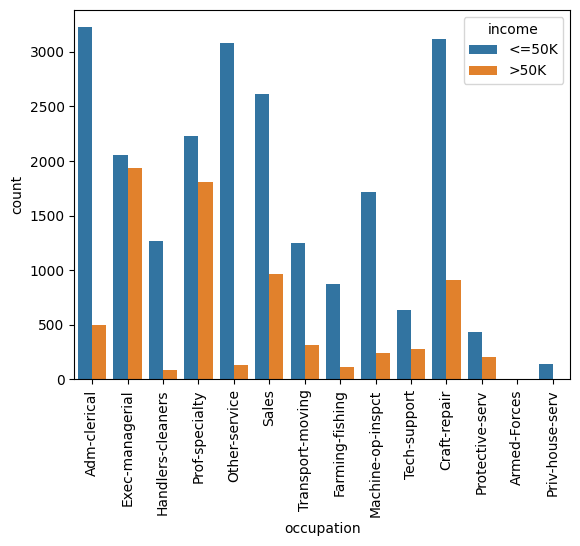

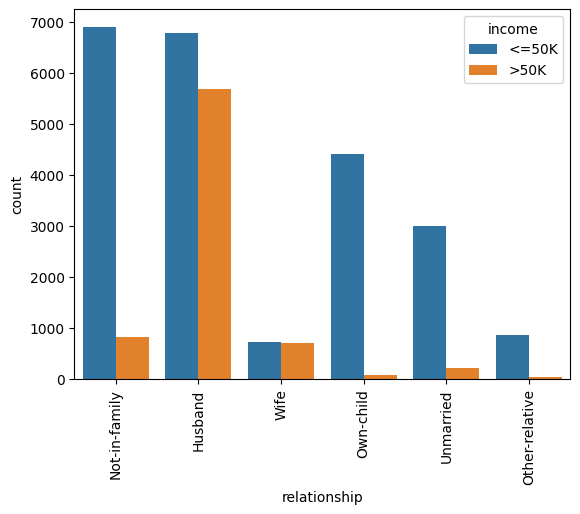

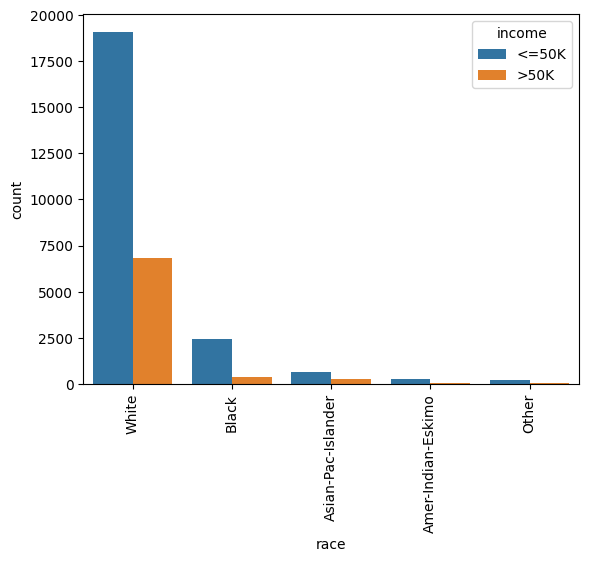

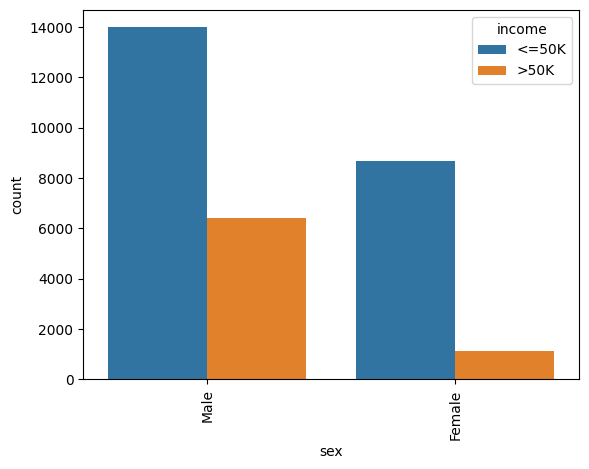

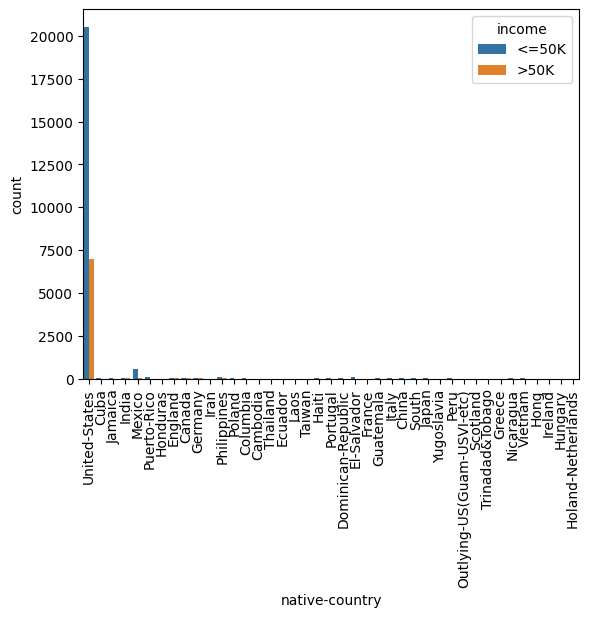

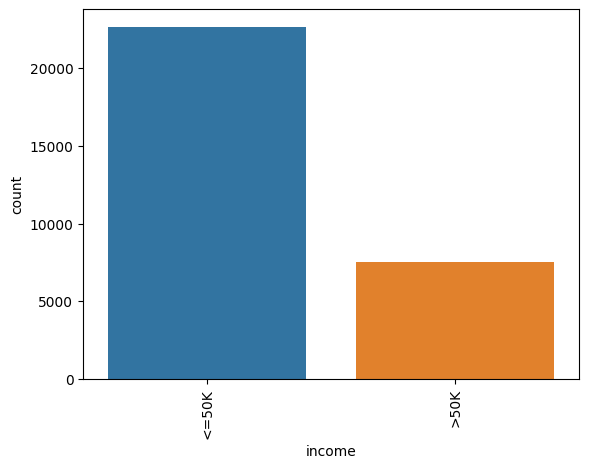

In [14]:
# Target Relation

for col in cat_cols:
    sns.countplot(data=df, x=col, hue='income')
    plt.xticks(rotation=90)
    plt.show()


In [15]:
# Encoding

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
